In [180]:
# Liubov Tovbin 013747890
# CMPE-257 Spring 2019

import numpy as np
import matplotlib.pyplot as plt
import random

In [181]:
def my_hm(R, slope, intercept, n):
# n - parameter fot PLA
# generates 100 training on a plane in range 0 <= x1,x2,<= R and plots them on a graph
# generates and 10,000 test points in range 0 <= x1,x2,<= R
# counts misclassified test points
# plots target function, f: x2 = slope*x1 + intercept
# points above f are blue circles
# points below f are red crosses

    print('target weights: w0 = ',-intercept,'  w1 = ',-slope,'  w2 = ', 1 )
    print('target slope and intercept are ', slope,' and ', intercept)
    
    # plot target perceptron
    t= np.arange(R + 1)
    f= slope*t + intercept 
    plt.plot(t, f, linestyle='-', color='green', label= 'Target')
                     
    # randomize first coordinate, x1, 100 values
    x1 = np.array(np.random.randint(R, size= 100), dtype = np.float64)

    # randomize second coordinate, x2, 100 values
    x2 = np.array(np.random.randint(R, size= 100), dtype = np.float64)

    # create an array to hold training values of y, 1 or -1, for each pair(x1,x2)
    y= np.empty(100, dtype= np.float64)
    for i in range(100):
        if x2[i] > slope*x1[i] + intercept:
            y[i]= 1.0
            plt.scatter(x1[i], x2[i], marker='o', color='b')
        else:
            y[i]= -1.0
            plt.scatter(x1[i], x2[i], marker='x', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # PLA
    # initial weigths
    w0 = w1 = w2 = 1.0
    #number of iterations, maximum iterations allowed is 1,000
    k = 0
    # flag to indicate that no missclassified points left
    done = False
    
    while done == False and k < 1000:       
        for i in np.random.permutation(100):    
            done = True
            
            if w0 + w1*x1[i] + w2*x2[i] > 0:
                s= 1.0
            else:
                s= -1.0  
                
            if  s*y[i] <= 1.0:                                      
                w0 = w0 + n*(y[i] - s)
                w1 = w1 + n*(y[i] - s)*x1[i]
                w2 = w2 + n*(y[i] - s)*x2[i]
                done = False
                break        
        k= k + 1
               
    print('number of interations', k)
    print('learned wieghts: ''w0=', w0,'  w1=', w1, '  w2=', w2)

    # final hypothesis, g
    g= -(w1*t)/w2 - w0/w2
    plt.plot(t, g, linestyle='--', color='black', label= 'Learned')
    plt.legend(loc= 'best')
    
    print('learned slope and intercept are ', -(w1/w2),' and ', -(w0/w2) )
    
# generate 10,000 test points
    # randomize first coordinate, x1
    x1 = np.array(np.random.randint(R, size= 10000), dtype = np.float64)

    # randomize second coordinate, x2 
    x2 = np.array(np.random.randint(R, size= 10000), dtype = np.float64)

    misclassified = 0
    for i in range(10000):
        f = slope*x1[i] + intercept
        s = w0 + w1*x1[i] + w2*x2[i]
        if (x2[i] > f and s < 0) or (x2[i] <= f and s > 0) :
            misclassified += 1
    print ('number of misclassified points in a test set = ', misclassified)


target weights: w0 =  -8000   w1 =  0.7   w2 =  1
target slope and intercept are  -0.7  and  8000
number of interations 1000
learned wieghts: w0= -28599.0   w1= -953999.0   w2= 2246001.0
learned slope and intercept are  0.4247544858617605  and  0.012733297981612653
number of misclassified points in a test set =  3359


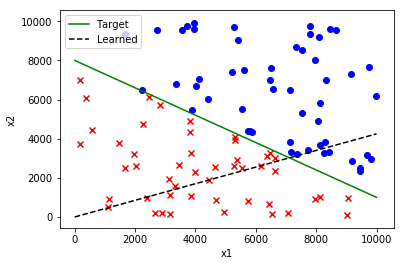

In [182]:
# HW1 Problem 9a
# n = 100
my_hm (10000, -0.7, 8000, 100)


target weights: w0 =  -8000   w1 =  0.7   w2 =  1
target slope and intercept are  -0.7  and  8000
number of interations 1000
learned wieghts: w0= -247.0   w1= 5717.0   w2= 9017.0
learned slope and intercept are  -0.6340246201619164  and  0.02739270267272929
number of misclassified points in a test set =  4520


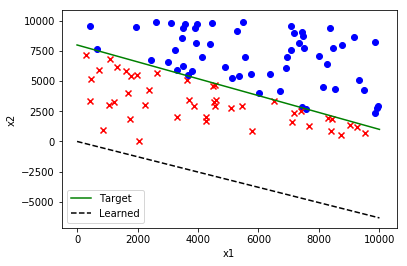

In [183]:
# HW1 Problem 9b
# n = 1
my_hm (10000, -0.7, 8000, 1)

target weights: w0 =  -8000   w1 =  0.7   w2 =  1
target slope and intercept are  -0.7  and  8000
number of interations 1000
learned wieghts: w0= -2.080000000000002   w1= 26.27999999999997   w2= -5.3400000000000105
learned slope and intercept are  4.9213483146067265  and  -0.3895131086142318
number of misclassified points in a test set =  4405


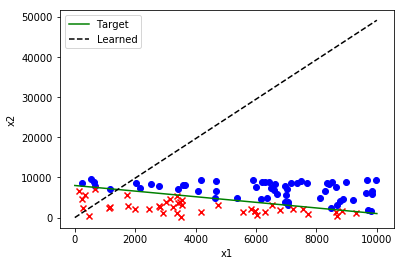

In [184]:
# HW1 Problem 9c
# n = 0.01
my_hm (10000, -0.7, 8000, 0.01)

target weights: w0 =  -8000   w1 =  0.7   w2 =  1
target slope and intercept are  -0.7  and  8000
number of interations 1000
learned wieghts: w0= 0.9702000000000033   w1= 1.704600000000002   w2= 0.7632000000000049
learned slope and intercept are  -2.233490566037724  and  -1.2712264150943358
number of misclassified points in a test set =  4438


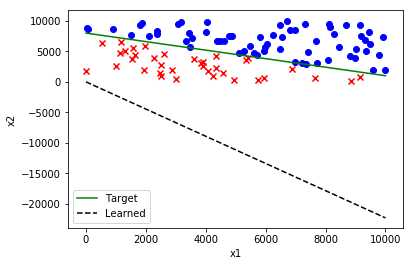

In [185]:
# HW1 Problem 9d
# n = 0.0001
my_hm (10000, -0.7, 8000, 0.0001)

Comments

In all 4 cases the PLA reached the maximum allowed number of iterations (1000) without converging. 
The final hypothesis, g, is far from the target function, f. However, the number of misclassified points in a test set is about the same.
Number of misclassified points in a test set:
4438 for n=0.0001 
4405 for n=0.01
4520 for n=1
3359 for n=100

The case with n=100 prformed the best, both, visually and judging by the error on the test set.